In [16]:
import numpy as np

def first_order_forward_difference(f, x, h):
    return (f(x + h) - f(x)) / h

def second_order_central_diff(f, x, h):
    return (f[x + h] - f[x - h]) / (2 * h)

def first_order_forward_difference_second_derivative(f, x, h):
    return (f(x + 2*h) - 2*f(x + h) + f(x)) / (h**2)

def second_order_central_difference_second_derivative(f, x, h):
    return (f(x + h) - 2*f(x) + f(x - h)) / (h**2)

def second_order_central_difference(f, x, h):
    return (f[x + 1] - f[x - 1]) / (2 * h)

def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = h * (0.5*y[0] + 0.5*y[-1] + np.sum(y[1:-1]))
    return integral

def simpsons_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = h/3 * (y[0] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-2:2]) + y[-1])
    return integral

In [23]:
t = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16]) 
x = np.array([0, 0.7, 1.8, 3.4, 5.1, 6.3, 7.3, 8.0, 8.4])  

def velocity(x, t, h):
    v = np.zeros_like(x)
    for i in range(1, len(x) - 1):
        v[i] = second_order_central_difference(x, i, h)
    return v

def acceleration(v, t, h):
    a = np.zeros_like(v)
    for i in range(1, len(v) - 1):
        a[i] = second_order_central_difference(v, i, h)
    return a

t_10_index = np.where(t == 10)[0][0]  
t_5_index = np.where(t == 5)[0]  

# Step size
h = t[1] - t[0]

v_t_10 = velocity(x, t, h)[t_10_index]
a_t_10 = acceleration(velocity(x, t, h), t, h)[t_10_index]

if t_5_index.size > 0:
    v_t_5 = velocity(x, t, h)[t_5_index[0]]
    a_t_5 = acceleration(velocity(x, t, h), t, h)[t_5_index[0]]
else:
    v_t_5 = "Not available"
    a_t_5 = "Not available"

print("(a) At t = 10 s:")
print("Velocity:", v_t_10, "m/s")
print("Acceleration:", a_t_10, "m/s^2")
print("\n(b) At t = 5 s:")
print("Velocity:", v_t_5)
print("Acceleration:", a_t_5)

(a) At t = 10 s:
Velocity: 0.55 m/s
Acceleration: -0.07499999999999998 m/s^2

(b) At t = 5 s:
Velocity: Not available
Acceleration: Not available


In [24]:
v_t_10 = velocity(x, t, h)
v_t_10

array([0.   , 0.45 , 0.675, 0.825, 0.725, 0.55 , 0.425, 0.275, 0.   ])

In [25]:
def f(x):
    return 5 * x * np.exp(-2 * x)

x_data = np.array([0.6, 1.5, 1.6, 2.5, 3.5])
f_data = np.array([0.9036, 0.3734, 0.3261, 0.08422, 0.01596])

def true_derivative(x):
    return 5 * (1 - 2 * x) * np.exp(-2 * x)

h = 0.1
h1 = 0.01

f_prime_estimates = first_order_forward_difference(f, x_data, h)
f_prime_estimates1 = first_order_forward_difference(f, x_data, h1)

true_derivatives = true_derivative(x_data)

# Print results
print("x\t\tTrue Derivative\t\tEstimated Derivative h=0.1\t\tEstimated Derivative at h=0.2")
print("------------------------------------------------------------------------------------------------------------------")
for i in range(len(x_data)):
    print("{:.2f}\t\t{:.6f}\t\t\t{:.6f}\t\t\t{:.6f}".format(x_data[i], true_derivatives[i], f_prime_estimates[i], f_prime_estimates1[i]))


x		True Derivative		Estimated Derivative h=0.1		Estimated Derivative at h=0.2
------------------------------------------------------------------------------------------------------------------
0.60		-0.301194			-0.404933			-0.313063
1.50		-0.497871			-0.473054			-0.495381
1.60		-0.448384			-0.424248			-0.445941
2.50		-0.134759			-0.125090			-0.133753
3.50		-0.027356			-0.025194			-0.027130


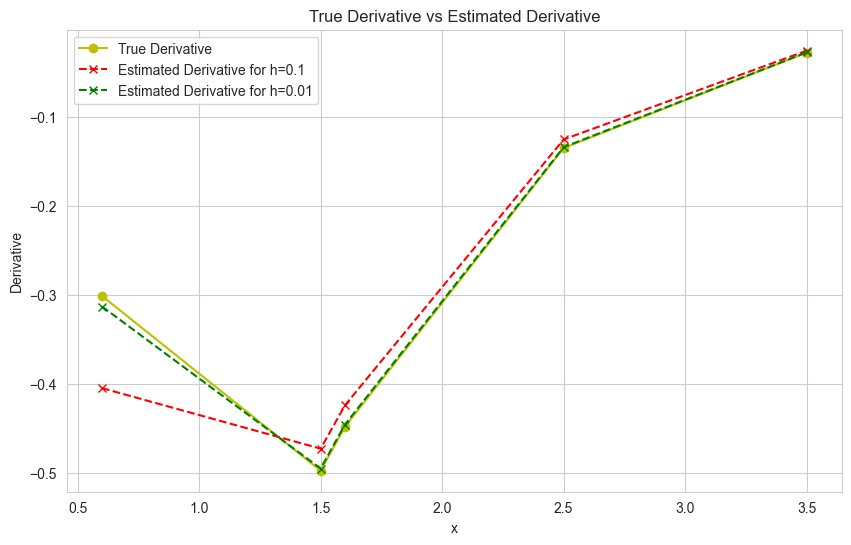

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(x_data, true_derivatives, label='True Derivative', marker='o', linestyle='-', color='y')
plt.plot(x_data, f_prime_estimates, label='Estimated Derivative for h=0.1', marker='x', linestyle='--', color='r')
plt.plot(x_data, f_prime_estimates1, label='Estimated Derivative for h=0.01', marker='x', linestyle='--', color='g')
plt.title('True Derivative vs Estimated Derivative')
plt.xlabel('x')
plt.ylabel('Derivative')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
import numpy as np
import math
from scipy.integrate import quad

def q_t(t):
    return 9 + 5 * np.cos(0.4 * t)**2

def c_t(t):
    return 5 * np.exp(-0.5 * t) + 2 * np.exp(0.15 * t)

def simpsons_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = h/3 * (y[0] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-2:2]) + y[-1])
    return integral

def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = h * (0.5*y[0] + 0.5*y[-1] + np.sum(y[1:-1]))
    return integral

def simpsons_three_eighth_rule(f, a, b, n):
    if n % 3 != 0:
        raise ValueError("Number of sub-intervals must be multiple of 3 for Simpson's 3/8 rule.")
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    integral = (3 * h / 8) * (y[0] + 3 * np.sum(y[1:-1:3]) + 3 * np.sum(y[2:-2:3]) + 2 * np.sum(y[3:-3:3]) + y[-1])
    return integral

t1 = 2 
t2 = 8 

n =10002  # Number of sub-intervals divisible by 3

mass_trapezoidal = trapezoidal_rule(lambda t: q_t(t) * c_t(t), t1, t2, n)
mass_simpsons_one_third = simpsons_rule(lambda t: q_t(t) * c_t(t), t1, t2, n)
mass_simpsons_three_eighth = simpsons_three_eighth_rule(lambda t: q_t(t) * c_t(t), t1, t2, n)

mass_quad, _ = quad(lambda t: q_t(t) * c_t(t), t1, t2)

print("Mass transported using Composite Trapezoidal rule:", mass_trapezoidal)
print("Mass transported using Composite Simpson's 1/3 rule:", mass_simpsons_one_third)
print("Mass transported using Composite Simpson's 3/8 rule:", mass_simpsons_three_eighth)
print("Mass transported using quad function:", mass_quad)


Mass transported using Composite Trapezoidal rule: 335.96253086153723
Mass transported using Composite Simpson's 1/3 rule: 335.9625300616257
Mass transported using Composite Simpson's 3/8 rule: 335.8990093067979
Mass transported using quad function: 335.9625300616258


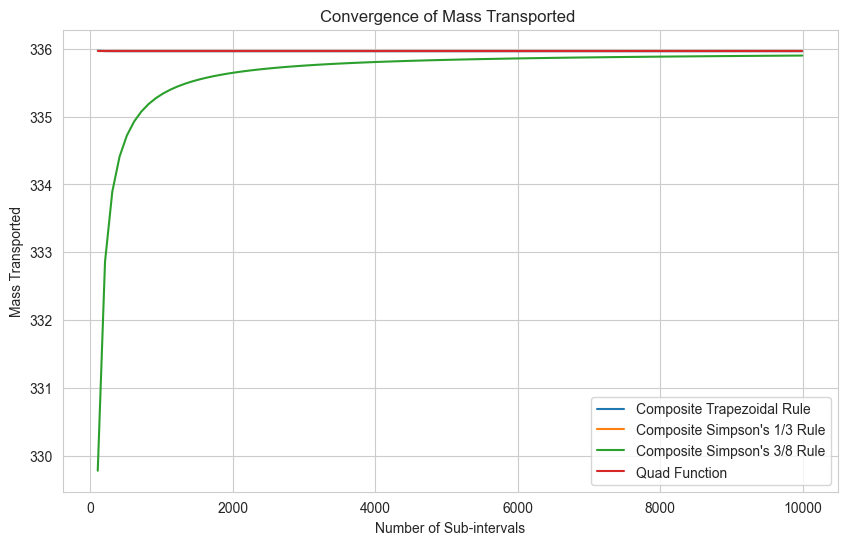

In [28]:
intervals = np.arange(102, 10002, 102)

mass_trapezoidal_values = []
mass_simpsons_one_third_values = []
mass_simpsons_three_eighth_values = []

for n in intervals:
    mass_trapezoidal_values.append(trapezoidal_rule(lambda t: q_t(t) * c_t(t), t1, t2, n))
    mass_simpsons_one_third_values.append(simpsons_rule(lambda t: q_t(t) * c_t(t), t1, t2, n))
    mass_simpsons_three_eighth_values.append(simpsons_three_eighth_rule(lambda t: q_t(t) * c_t(t), t1, t2, n))

mass_quad_values = [quad(lambda t: q_t(t) * c_t(t), t1, t2)[0] for _ in intervals]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(intervals, mass_trapezoidal_values, label="Composite Trapezoidal Rule")
plt.plot(intervals, mass_simpsons_one_third_values, label="Composite Simpson's 1/3 Rule")
plt.plot(intervals, mass_simpsons_three_eighth_values, label="Composite Simpson's 3/8 Rule")
plt.plot(intervals, mass_quad_values, label="Quad Function")
plt.xlabel("Number of Sub-intervals")
plt.ylabel("Mass Transported")
plt.title("Convergence of Mass Transported ")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
import numpy as np
import math

def func(x):
    return x * np.exp(-x)

def simpsons_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = h/3 * (y[0] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-2:2]) + y[-1])
    return integral

exact_value = 1 - 2 / math.e

intervals = [10, 100, 1000]

print("Interval Size (n)Approximate Value   Exact Value   ")
for n in intervals:
    approx_value = simpsons_rule(func, lower_limit, upper_limit, n)
    print(f"{n:<17} | {approx_value:<17.16f} | {exact_value:<11.16f}|")


Interval Size (n)Approximate Value   Exact Value   


NameError: name 'lower_limit' is not defined

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt

def func(x):
    return x * np.exp(-x)

def simpsons_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = h/3 * (y[0] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-2:2]) + y[-1])
    return integral

exact_value = 1 - 2 / math.e


intervals = [ 1000, 1500, 2000]

approx_values = [simpsons_rule(func, lower_limit, upper_limit, n) for n in intervals]

print("Interval Size (n)  Approximate Value     Exact Value ")
for n in intervals:
    approx_value = simpsons_rule(func, lower_limit, upper_limit, n)
    print(f"{n:<17} | {approx_value:<17.16f} | {exact_value:<11.16f}|")

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(intervals, approx_values, marker='o', linestyle='-', color='b', label='Approx Value')
plt.axhline(y=exact_value, color='r', linestyle='--', label='Exact Value')
plt.xscale('log')
plt.xlabel('Number of Interval')
plt.ylabel('Value')
plt.title('Convergence of Simpso Rule ')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'lower_limit' is not defined